In [1]:
import os

data_path = "/mnt/data"

In [1]:
from geolifeclef.utils import get_spark

spark = get_spark()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/24 15:53:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/24 15:53:31 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in mesos/standalone/kubernetes and LOCAL_DIRS in YARN).
24/05/24 15:53:33 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [11]:
!gsutil -m rm -r gs://dsgt-clef-geolifeclef-2024/data/processed/dct_timeseries/combined_timeseries_v4

Removing gs://dsgt-clef-geolifeclef-2024/data/processed/dct_timeseries/combined_timeseries_v4/#1716566200358348...
Removing gs://dsgt-clef-geolifeclef-2024/data/processed/dct_timeseries/combined_timeseries_v4/_SUCCESS#1716566200737514...
Removing gs://dsgt-clef-geolifeclef-2024/data/processed/dct_timeseries/combined_timeseries_v4/part-00000-9e9498a8-fbfa-48cc-87e1-69926ae7f8ac-c000.snappy.parquet#1716566110813356...
Removing gs://dsgt-clef-geolifeclef-2024/data/processed/dct_timeseries/combined_timeseries_v4/part-00003-9e9498a8-fbfa-48cc-87e1-69926ae7f8ac-c000.snappy.parquet#1716566111463459...
Removing gs://dsgt-clef-geolifeclef-2024/data/processed/dct_timeseries/combined_timeseries_v4/part-00001-9e9498a8-fbfa-48cc-87e1-69926ae7f8ac-c000.snappy.parquet#1716566111031746...
Removing gs://dsgt-clef-geolifeclef-2024/data/processed/dct_timeseries/combined_timeseries_v4/part-00002-9e9498a8-fbfa-48cc-87e1-69926ae7f8ac-c000.snappy.parquet#1716566111237351...
Removing gs://dsgt-clef-geolifecle

In [13]:
test = spark.read.parquet(
    "gs://dsgt-clef-geolifeclef-2024/data/processed/dct_timeseries/combined_timeseries_v4"
)
test.show()

+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|surveyId|          TimeSeries|             ts_blue|            ts_green|              ts_nir|              ts_red|            ts_swir1|            ts_swir2|
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|       7|[14.0, 16.0, 16.0...|[2400.0, 12.30017...|[4006.0, 13.96218...|[9914.0, -6.11315...|[5010.0, -16.3345...|[12680.0, -20.726...|[8778.0, -35.7894...|
|     162|[6.0, 6.0, 6.0, 5...|[944.0, 17.874538...|[1868.0, 38.69430...|[6864.0, 144.7241...|[1440.0, 66.73098...|[4668.0, 199.4794...|[2448.0, 156.0766...|
|     514|[12.0, 13.0, 12.0...|[2124.0, -18.2351...|[3734.0, -41.5326...|[10046.0, -104.97...|[4162.0, -64.1931...|[9234.0, -233.614...|[6548.0, -162.984...|
|     549|[19.0, 24.0, 21.0...|[3250.0, -16.4568...|

In [14]:
# Create a condition to check if any column in the row is null
from pyspark.sql import functions as F

null_condition = None
for column in test.columns:
    if null_condition is None:
        null_condition = F.col(column).isNull()
    else:
        null_condition = null_condition | F.col(column).isNull()

# Filter rows where any column has null values
any_null_df = test.filter(null_condition)

any_null_df.show()

+--------+----------+-------+--------+------+------+--------+--------+
|surveyId|TimeSeries|ts_blue|ts_green|ts_nir|ts_red|ts_swir1|ts_swir2|
+--------+----------+-------+--------+------+------+--------+--------+
+--------+----------+-------+--------+------+------+--------+--------+



In [15]:
test2 = spark.read.parquet(
    "gs://dsgt-clef-geolifeclef-2024/data/processed/dct_timeseries/combined_timeseries_v3"
)
test2.show()

+--------+--------+-------------------+--------------------+---------+--------+----+-----------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|surveyId| dataset|           lat_proj|            lon_proj|      lat|     lon|year|geoUncertaintyInM|speciesId|          TimeSeries|             ts_blue|            ts_green|              ts_nir|              ts_red|            ts_swir1|            ts_swir2|
+--------+--------+-------------------+--------------------+---------+--------+----+-----------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    4210|pa_train|-1644207.1223485535| 1.669148485768465E7| 55.31917|10.35217|2019|             10.0|   2922.0|[5.0, 6.0, 3.0, 7...|[920.0, 6.7140484...|[2034.0, -13.1343...|[8780.0, 13.23476...|[1646.0, -28.7461...|[60

In [17]:
test.filter(F.col("surveyId") == 99641).show()

+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|surveyId|          TimeSeries|             ts_blue|            ts_green|              ts_nir|              ts_red|            ts_swir1|            ts_swir2|
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   99641|[7.0, 12.0, 11.0,...|[1294.0, 66.60286...|[2364.0, 125.5421...|[6038.0, 236.7294...|[2398.0, 129.4770...|[5874.0, 109.7955...|[3682.0, 127.5129...|
|   99641|[7.0, 12.0, 11.0,...|[1294.0, 66.60286...|[2364.0, 125.5421...|[6038.0, 236.7294...|[2398.0, 129.4770...|[5874.0, 109.7955...|[3682.0, 127.5129...|
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+



In [8]:
null_condition = None
for column in test2.columns:
    if null_condition is None:
        null_condition = F.col(column).isNull()
    else:
        null_condition = null_condition | F.col(column).isNull()

# Filter rows where any column has null values
any_null_df = test2.filter(null_condition)

any_null_df.show()

+--------+--------+-------------------+--------------------+---------+--------+----+-----------------+---------+----------+-------+--------+------+------+--------+--------+
|surveyId| dataset|           lat_proj|            lon_proj|      lat|     lon|year|geoUncertaintyInM|speciesId|TimeSeries|ts_blue|ts_green|ts_nir|ts_red|ts_swir1|ts_swir2|
+--------+--------+-------------------+--------------------+---------+--------+----+-----------------+---------+----------+-------+--------+------+------+--------+--------+
|   20346|pa_train| -1902628.047392428|1.6311140357082862E7|51.449228|9.794551|2017|              5.0|  10392.0|      NULL|   NULL|    NULL|  NULL|  NULL|    NULL|    NULL|
|   20346|pa_train| -1902628.047392428|1.6311140357082862E7|51.449228|9.794551|2017|              5.0|    733.0|      NULL|   NULL|    NULL|  NULL|  NULL|    NULL|    NULL|
|   20346|pa_train| -1902628.047392428|1.6311140357082862E7|51.449228|9.794551|2017|              5.0|   3722.0|      NULL|   NULL|    

In [9]:
test.count()

3847631

In [21]:
test.select("surveyId").distinct().count()

73207

In [7]:
test.first().green

[2034.0,
 -13.134340286254883,
 12.280508995056152,
 -34.74225997924805,
 14.97689437866211,
 -18.85256004333496,
 -12.330431938171387,
 -22.402753829956055,
 17.259876251220703,
 -33.516971588134766,
 -27.6328067779541,
 -10.710028648376465,
 2.756471633911133,
 -19.392194747924805,
 13.391468048095703,
 -29.046390533447266,
 -3.3551981449127197,
 11.83356761932373,
 3.0044918060302734,
 11.54992961883545,
 -5.28064489364624,
 14.566543579101562,
 -11.432637214660645,
 -1.8562196493148804,
 7.2356367111206055,
 -23.812368392944336,
 6.525002479553223,
 -4.5048723220825195,
 -0.01216975413262844,
 -1.3936944007873535,
 37.003501892089844,
 13.024680137634277,
 0.6737620830535889,
 13.010631561279297,
 19.289697647094727,
 1.263028860092163,
 -17.351898193359375,
 18.03104591369629,
 -24.07442855834961,
 -9.796640396118164,
 -43.84062194824219,
 -42.717864990234375,
 26.079858779907227,
 0.32195019721984863,
 32.590023040771484,
 -9.345061302185059,
 16.312259674072266,
 1.9036566019058

In [2]:
from google.cloud import storage

storage_client = storage.Client()
blobs = storage_client.list_blobs(
    "dsgt-clef-geolifeclef-2024", prefix="data/processed/dct_timeseries"
)
filenames = [blob.name for blob in blobs if "PO" in blob.name]
filenames

['data/processed/dct_timeseries/GLC24-PO-train-landsat-time-series-blue/GLC24-PO-train-landsat-time-series-blue/',
 'data/processed/dct_timeseries/GLC24-PO-train-landsat-time-series-blue/GLC24-PO-train-landsat-time-series-blue/_SUCCESS',
 'data/processed/dct_timeseries/GLC24-PO-train-landsat-time-series-blue/GLC24-PO-train-landsat-time-series-blue/part-00000-247b72c5-74c1-471d-b5d2-f88034ffc9fb-c000.snappy.parquet',
 'data/processed/dct_timeseries/GLC24-PO-train-landsat-time-series-blue/GLC24-PO-train-landsat-time-series-blue/part-00001-247b72c5-74c1-471d-b5d2-f88034ffc9fb-c000.snappy.parquet',
 'data/processed/dct_timeseries/GLC24-PO-train-landsat-time-series-blue/GLC24-PO-train-landsat-time-series-blue/part-00002-247b72c5-74c1-471d-b5d2-f88034ffc9fb-c000.snappy.parquet',
 'data/processed/dct_timeseries/GLC24-PO-train-landsat-time-series-blue/GLC24-PO-train-landsat-time-series-blue/part-00003-247b72c5-74c1-471d-b5d2-f88034ffc9fb-c000.snappy.parquet',
 'data/processed/dct_timeseries/GL

In [14]:
from pathlib import Path

names = [Path(filename).stem for filename in filenames if "GLC" in Path(filename).stem]
names

['GLC24-PO-train-landsat-time-series-blue',
 'GLC24-PO-train-landsat-time-series-green',
 'GLC24-PO-train-landsat-time-series-nir',
 'GLC24-PO-train-landsat-time-series-red',
 'GLC24-PO-train-landsat-time-series-swir1',
 'GLC24-PO-train-landsat-time-series-swir2']

In [10]:
df = spark.read.parquet(
    "gs://dsgt-clef-geolifeclef-2024/" + filenames[0], header=True, inferSchema=True
)
df.show(truncate=False)

+--------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
from pyspark.sql import functions as F

In [19]:
df.filter(F.col("surveyId") == 748026).show()

+--------+--------------------+--------------------+
|surveyId|          TimeSeries|                 DCT|
+--------+--------------------+--------------------+
|  748026|[13.0, 15.0, 18.0...|[2194.0, 86.50111...|
+--------+--------------------+--------------------+



In [9]:
df.show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|PAR1 ��\t��\t�稺�� \b  �����   ���i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v �i\v  j\v j\v j\v j\v j\v j\v j\v \aj\v \bj\v \tj\v |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|j\v \vj\v \fj\v                                                                                                                                                                                                               |
|j\v j\v j\v j\v j\v j\v j\v j\v j\v j\v j\v j\v j\v j\v j\v j\v j\v j\v j\v  j\v !

In [27]:
import pyspark.sql.functions as F
import pyspark.sql.types as T

In [36]:
columns = [
    F.col(column_name) for column_name in df.columns if column_name != "surveyId"
]
df = df.withColumn("TimeSeries", F.array(columns))
df = df.select("surveyId", "TimeSeries")

In [57]:
import numpy as np
from scipy.fft import dct, idct

In [82]:
def dct_op(x):
    x = np.array(x)
    for i in range(len(x) - 1, -1, -1):
        if x[i] != None:
            break
    x = x[: i + 1]
    x_dct = dct(x)
    dct_filter = x_dct.copy()
    dct_filter = dct_filter[:8]
    return dct_filter.tolist()

In [84]:
ts = df.first()["TimeSeries"]
ts_dct = dct_op(ts)
ts_dct = np.array(ts_dct)
ts_dct_show = np.zeros(80, dtype=ts_dct.dtype)
ts_dct_show[:8] = ts_dct
ts_hat = idct(np.array(ts_dct_show))

In [85]:
ts_hat

array([14.24689557, 14.25680526, 14.27662188, 14.30631987, 14.3458135 ,
       14.39490706, 14.45323948, 14.52023132, 14.59504253, 14.67654863,
       14.76334166, 14.85376016, 14.94594954, 15.03795119, 15.12781569,
       15.21373238, 15.29416552, 15.3679852 , 15.43458109, 15.49394706,
       15.54672651, 15.59421072, 15.63828578, 15.68132788, 15.7260508 ,
       15.77531404, 15.83190342, 15.89829961, 15.97645178, 16.06757458,
       16.17198588, 16.28900094, 16.41689511, 16.55294267, 16.69353416,
       16.8343685 , 16.97071046, 17.09769834, 17.21068224, 17.3055696 ,
       17.37915306, 17.42939536, 17.45564789, 17.458783  , 17.44122532,
       17.40687404, 17.36091541, 17.30953247, 17.25952695, 17.21787503,
       17.19124447, 17.18550475, 17.20526362, 17.25346346, 17.33106797,
       17.4368652 , 17.56740564, 17.71708637, 17.87838218, 18.0422153 ,
       18.19844553, 18.33645387, 18.4457859 , 18.51681559, 18.5413881 ,
       18.5133997 , 18.42927608, 18.28831561, 18.09287163, 17.84

Text(0.5, 0, 'Index')

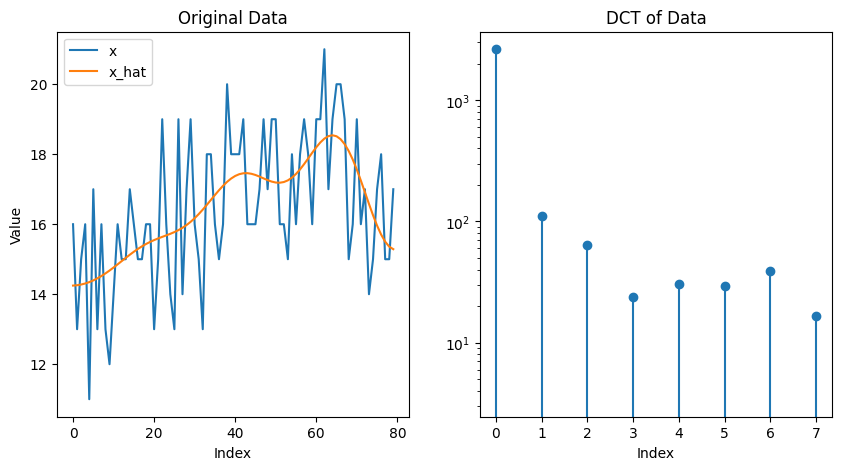

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ts, label="x")
plt.plot(ts_hat, label="x_hat")
plt.legend()
plt.title("Original Data")
plt.xlabel("Index")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.yscale("log")
plt.stem(np.abs(ts_dct), basefmt=" ")
plt.title("DCT of Data")
plt.xlabel("Index")

In [87]:
dct_udf = F.udf(dct_op, T.ArrayType(T.FloatType()))

In [88]:
df = df.withColumn("DCT", dct_udf(F.col("TimeSeries")))

In [91]:
df.select("DCT").show(truncate=False)

+------------------------------------------------------------------------------------------+
|DCT                                                                                       |
+------------------------------------------------------------------------------------------+
|[2630.0, -110.66469, -64.2666, 23.600897, -30.721392, 29.317095, -39.069355, 16.45659]    |
|[1754.0, -30.704947, 16.030937, -3.863989, -12.840116, -25.100079, -24.331112, -25.314621]|
|[3354.0, -22.7369, -9.378818, 21.27203, 6.489778, -24.981974, 31.429348, -47.90112]       |
|[2874.0, -4.146671, 3.8644226, 57.06742, 19.344332, -8.616505, -22.688023, -68.705826]    |
|[2450.0, 23.800007, 21.952477, 6.6883917, -14.114759, -5.8662257, -3.1567936, 39.843964]  |
|[3260.0, 158.05827, -5.979906, 72.06137, 19.078648, 17.860338, 43.836685, -59.571404]     |
|[5010.0, -16.334524, 377.54773, 110.91809, 77.86684, 148.34804, -114.301796, 1.5433626]   |
|[2672.0, 45.863785, 2.2134295, 14.158568, -1.882467, 0.747262, 0.1419

In [92]:
df.first()

Row(surveyId=1, TimeSeries=[16.0, 13.0, 15.0, 16.0, 11.0, 17.0, 13.0, 16.0, 13.0, 12.0, 14.0, 16.0, 15.0, 15.0, 17.0, 16.0, 15.0, 15.0, 16.0, 16.0, 13.0, 15.0, 19.0, 16.0, 14.0, 13.0, 19.0, 14.0, 17.0, 19.0, 16.0, 15.0, 13.0, 18.0, 18.0, 16.0, 15.0, 16.0, 20.0, 18.0, 18.0, 18.0, 19.0, 16.0, 16.0, 16.0, 17.0, 19.0, 17.0, 19.0, 19.0, 16.0, 16.0, 15.0, 18.0, 16.0, 18.0, 19.0, 18.0, 16.0, 19.0, 19.0, 21.0, 17.0, 19.0, 20.0, 20.0, 19.0, 15.0, 16.0, 19.0, 16.0, 17.0, 14.0, 15.0, 17.0, 18.0, 15.0, 15.0, 17.0, None, None, None, None], DCT=[2630.0, -110.66468811035156, -64.2666015625, 23.60089683532715, -30.721391677856445, 29.317094802856445, -39.06935501098633, 16.45659065246582])

In [101]:
samples = df.take(4)

In [102]:
row = samples[3]

In [103]:
ts = row["TimeSeries"]
ts_dct = np.array(row["DCT"])
ts_dct_show = np.zeros(80, dtype=ts_dct.dtype)
ts_dct_show[:8] = ts_dct
ts_hat = idct(np.array(ts_dct_show))

Text(0.5, 0, 'Index')

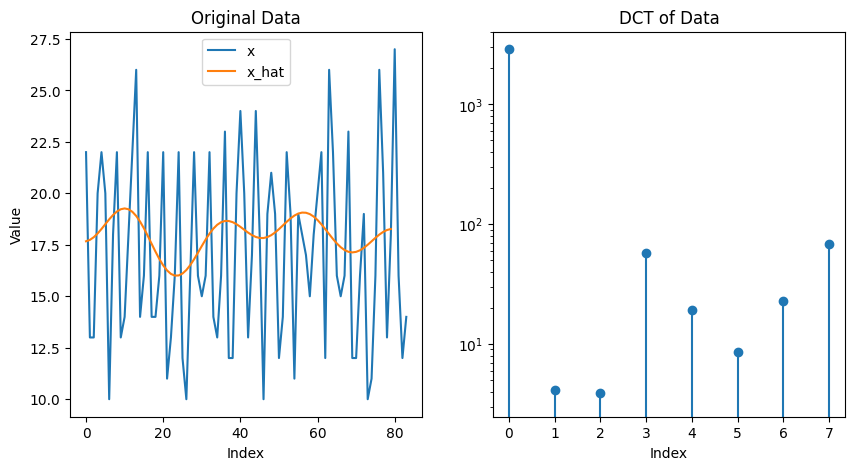

In [104]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ts, label="x")
plt.plot(ts_hat, label="x_hat")
plt.legend()
plt.title("Original Data")
plt.xlabel("Index")
plt.ylabel("Value")

plt.subplot(1, 2, 2)
plt.yscale("log")
plt.stem(np.abs(ts_dct), basefmt=" ")
plt.title("DCT of Data")
plt.xlabel("Index")

In [105]:
df.write.parquet("gs://dsgt-clef-geolifeclef-2024/data/processed/dct_timeseries/red")

In [15]:
test = spark.read.parquet(
    "gs://dsgt-clef-geolifeclef-2024/data/processed/dct_timeseries/GLC24-PO-train-landsat-time-series-blue"
)

AnalysisException: [UNABLE_TO_INFER_SCHEMA] Unable to infer schema for Parquet. It must be specified manually.